# Comcast Telecom Consumer Complaints.

Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Dataset

In [7]:
df = pd.read_csv("C:/Users/Hema/OneDrive/Desktop/Projects/Comcast_telecom_data.csv")

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


No Nan Values are present in the Dataset

In [10]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [11]:
df.shape

(2224, 11)

In [12]:
df = df.drop(['Ticket #','Time'], axis=1)

In [13]:
df.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


First Task: Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [14]:
# Pandas to datetime() method helps to convert string Date time into Python Date time object.
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
#setting 'Date_month_year' as index
df=df.set_index('Date_month_year')

Plotting monthly chart

Text(0.5, 1.0, 'Monthly Trend')

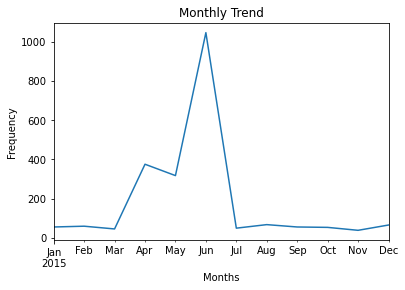

In [15]:
#dataframe.groupby() function is splitting the data into groups according to frequency.
months= df.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Monthly Trend")

Insights: From the above chart,we can clearly see that maximum complaints were raised for the month of June 2015.

In [16]:
#value_counts() function is getting a series containing counts if unique values for the date column.
df['Date'].value_counts(dropna=False)[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

Plotting daily chart

Text(0.5, 1.0, 'Daily Trend')

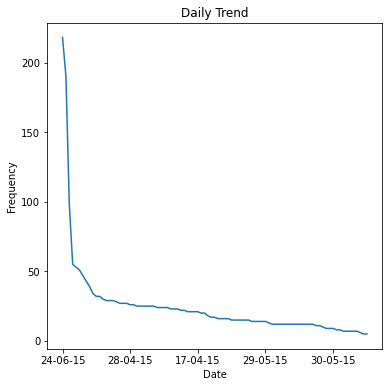

In [17]:
df= df.sort_values(by='Date')
plt.figure(figsize=(6,6))
df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Daily Trend")

Task2- Provide a table with the frequency of complaint types.

In [18]:
df['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

Task 3- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

<AxesSubplot:>

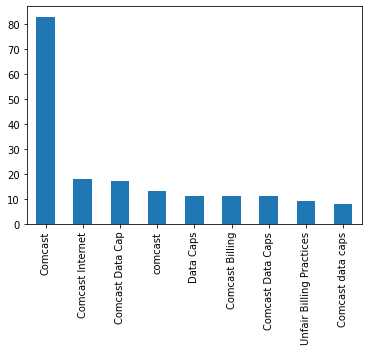

In [18]:
df['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

Task 3- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [19]:
Internet_issues1=df[df['Customer Complaint'].str.contains("network")].count()

In [20]:
Internet_issues2=df[df['Customer Complaint'].str.contains("speed")].count()

In [21]:
Internet_issues3=df[df['Customer Complaint'].str.contains("data")].count()

In [22]:
Internet_issues4=df[df['Customer Complaint'].str.contains("internet")].count()

In [23]:
Billing_issues1=df[df['Customer Complaint'].str.contains("Bill")].count()

In [24]:
Billing_issues2=df[df['Customer Complaint'].str.contains("Billing")].count()

In [25]:
Billing_issues3=df[df['Customer Complaint'].str.contains("Charges")].count()

In [26]:
Service_issues1=df[df['Customer Complaint'].str.contains("services")].count()

In [27]:
Service_issues2=df[df['Customer Complaint'].str.contains("customer")].count()

In [28]:
Total_internet_issues=Internet_issues1+Internet_issues2+Internet_issues3+Internet_issues4
print(Total_internet_issues)

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [29]:
Total_billing_issues=Billing_issues1+Billing_issues2+Billing_issues3
print(Total_billing_issues)

Customer Complaint             384
Date                           384
Received Via                   384
City                           384
State                          384
Zip code                       384
Status                         384
Filing on Behalf of Someone    384
dtype: int64


In [31]:
Total_Service_issues=Service_issues1+Service_issues2
print(Total_Service_issues)

Customer Complaint             86
Date                           86
Received Via                   86
City                           86
State                          86
Zip code                       86
Status                         86
Filing on Behalf of Someone    86
dtype: int64


In [32]:
Other_issues=2224- (Total_internet_issues+Total_billing_issues+Total_Service_issues)
print(Other_issues)

Customer Complaint             1380
Date                           1380
Received Via                   1380
City                           1380
State                          1380
Zip code                       1380
Status                         1380
Filing on Behalf of Someone    1380
dtype: int64


In [33]:
#####INSIGHTS: From the above analysis we can see that the other issues are maximum.

Task 4- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [34]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [35]:
df["newStatus"]=["Open" if Status=="Open" or Status=="pending" else "closed" for Status in df["Status"]]
df= df.drop(['Status'],axis=1)
df

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,closed
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,closed
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,closed


Task 5- Provide state wise status of complaints.

In [36]:
df.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

INSIGHTS: From the above table, we can see that Georgia has maximum complaints. 

Task: Provide State wise status of complaints in a stacked bar chart.

In [37]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack()
print(Status_complaints)

newStatus             Open  closed
State                             
Alabama                4.0    22.0
Arizona                2.0    18.0
Arkansas               NaN     6.0
California            47.0   173.0
Colorado              12.0    68.0
Connecticut            2.0    10.0
Delaware               3.0     9.0
District Of Columbia   1.0    15.0
District of Columbia   NaN     1.0
Florida               35.0   205.0
Georgia               35.0   253.0
Illinois              23.0   141.0
Indiana                8.0    51.0
Iowa                   NaN     1.0
Kansas                 NaN     2.0
Kentucky               NaN     7.0
Louisiana              NaN    13.0
Maine                  2.0     3.0
Maryland              13.0    65.0
Massachusetts         10.0    51.0
Michigan              18.0    97.0
Minnesota              2.0    31.0
Mississippi            9.0    30.0
Missouri               1.0     3.0
Montana                NaN     1.0
Nevada                 NaN     1.0
New Hampshire       

<AxesSubplot:xlabel='State'>

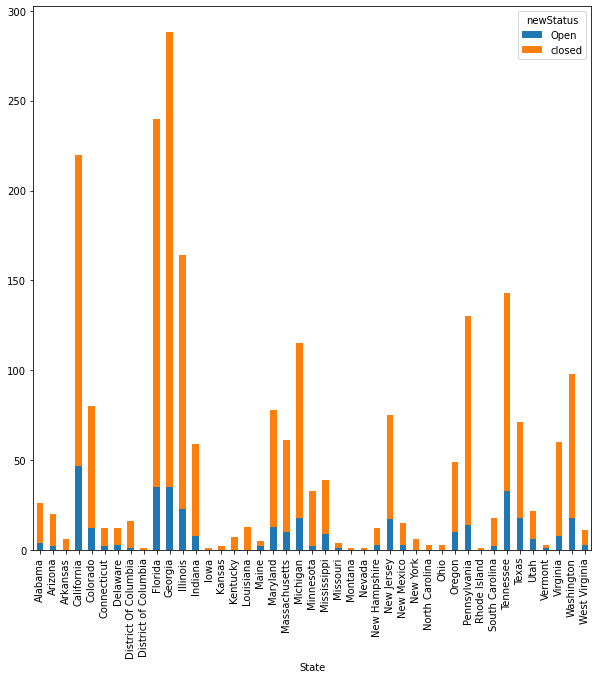

In [38]:
Status_complaints.plot.bar(figsize=(10,10), stacked=True)

Task: State which has the highest percentage of unresolved complaints i.e. California

In [39]:
print(df['newStatus'].value_counts())

closed    1861
Open       363
Name: newStatus, dtype: int64


newStatus             Open  closed  unresolved_cmp_prct
State                                                  
California            47.0   173.0            12.947658
Georgia               35.0   253.0             9.641873
Florida               35.0   205.0             9.641873
Tennessee             33.0   110.0             9.090909
Illinois              23.0   141.0             6.336088
Texas                 18.0    53.0             4.958678
Michigan              18.0    97.0             4.958678
Washington            18.0    80.0             4.958678
New Jersey            17.0    58.0             4.683196
Pennsylvania          14.0   116.0             3.856749
Maryland              13.0    65.0             3.581267
Colorado              12.0    68.0             3.305785
Oregon                10.0    39.0             2.754821
Massachusetts         10.0    51.0             2.754821
Mississippi            9.0    30.0             2.479339
Virginia               8.0    52.0             2

<AxesSubplot:xlabel='State'>

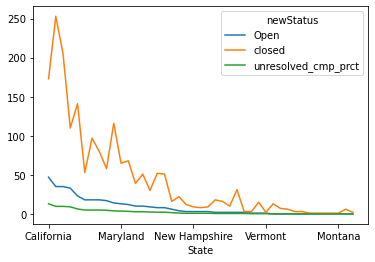

In [40]:
unresolved_data = df.groupby(["State",'newStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data['unresolved_cmp_prct'] = unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()

In [44]:
resolved_data = df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['closed']/resolved_data['closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.134336
Internet              49.865664
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

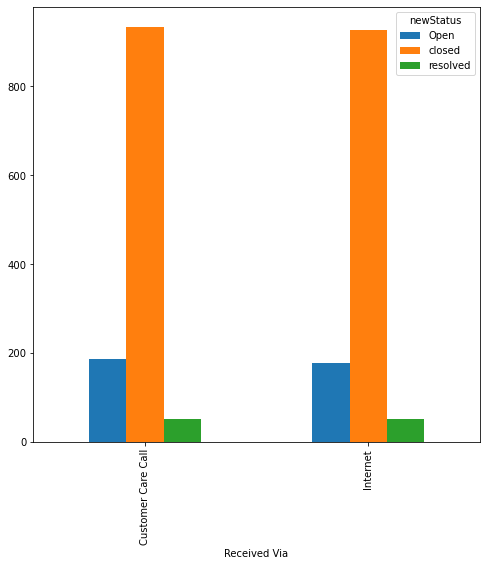

In [45]:
resolved_data.plot(kind="bar", figsize=(8,8))

INSIGHTS: From the above chart we can cleary see that 50.13% complaints resolved for Customer Care Call and 49.86% for received via internet.  